In [1]:
# Import necessary packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the files to pandas dataframe 
driver_ids = pd.read_csv("driver_ids.csv")
ride_ids = pd.read_csv("ride_ids.csv")
ride_timestamps = pd.read_csv("ride_timestamps.csv")

In [3]:
# Check each dataframe 
driver_ids.head(5)

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [4]:
ride_ids.head(5)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [5]:
ride_timestamps.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [6]:
# As we need to work with this dataframe quite a lot, let's rename it as df
df = ride_ids 

In [7]:
# Descriptive statistics for ride_ids  
df.describe()

,ride_distance,ride_duration,ride_prime_time
count,193502.000000,193502.000000,193502.000000
mean,6955.218266,858.966099,17.305893
std,8929.444606,571.375818,30.825800
min,-2.000000,2.000000,0.000000
25%,2459.000000,491.000000,0.000000
50%,4015.000000,727.000000,0.000000
75%,7193.000000,1069.000000,25.000000
max,724679.000000,28204.000000,500.000000


In [8]:
# Calculating revenue for each driver + classifying short ride/long ride 
revenue = []
short_ride = []
long_ride = []
for index, row in ride_ids.iterrows():
    distance = row["ride_distance"]/(1609.344) # Convert meters to miles
    duration = row["ride_duration"]/(60) # Convert seconds to minutes
    fare = round((2 + 1.75 + 1.15*distance + 0.22*duration),2) 
    fare_new = round(fare + fare*(row["ride_prime_time"]/100),2) # Adding prime time if available 
    if fare_new >=5 or fare_new <=400: 
        revenue.append(fare_new)
    elif fare_new <5: # Adjust the fare to fit the minimum
        fare_new = 5
        revenue.append(fare_new)
    elif fare_new >400: # Adjust the fare to fit the maximum 
        fare_new = 400
        revenue.append(fare_new)
    if row["ride_distance"] <= 2459: # Based on the 25% quantile of ride_distance 
        short_ride.append(1)
        long_ride.append(0)
    elif row["ride_distance"] >= 7193: # Based on the 75% quantile of ride_distance 
        short_ride.append(0)
        long_ride.append(1)
    else:
        short_ride.append(0)
        long_ride.append(0)

In [9]:
# Adding new collumns to the dataframe 
df["revenue"] = revenue
df["short_ride"] = short_ride
df["long_ride"] = long_ride

In [10]:
# Let's check how it is 
df.head(10)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,revenue,short_ride,long_ride
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,9.36,1,0
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.12,0,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.19,0,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,78.30,0,1
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,19.42,0,0
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100,21.14,0,0
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0,6.15,1,0
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25,10.56,0,0
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75,18.83,0,0
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50,14.64,0,0


In [11]:
# Now let's add revenue per driver to the driver_ids dataframe 
revenue_per_driver = df.groupby("driver_id")["revenue"].sum()
revenue_df = revenue_per_driver.to_frame()

In [12]:
revenue_df.head()

,revenue
driver_id,
002be0ffdc997bd5c50703158b7c2491,3654.63
007f0389f9c7b03ef97098422f902e62,332.42
011e5c5dfc5c2c92501b8b24d47509bc,494.27
0152a2f305e71d26cc964f8d4411add9,2644.82
01674381af7edd264113d4e6ed55ecda,5463.35


In [13]:
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 002be0ffdc997bd5c50703158b7c2491 to ffff51a71f2f185ec5e97d59dbcd7a78
Data columns (total 1 columns):
revenue    937 non-null float64
dtypes: float64(1)
memory usage: 14.6+ KB


In [14]:
# Don't need this if you have 2 collumns in revenue.info()
# I only have 1 collumn
revenue_df['driver_id'] = revenue_df.index

In [15]:
revenue_df.info()

# Now I have 2 collumns 

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 002be0ffdc997bd5c50703158b7c2491 to ffff51a71f2f185ec5e97d59dbcd7a78
Data columns (total 2 columns):
revenue      937 non-null float64
driver_id    937 non-null object
dtypes: float64(1), object(1)
memory usage: 22.0+ KB


In [16]:
# Adding revenue to each driver in the driver_ids dataframe 
df2 = pd.merge(driver_ids, revenue_df)

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'driver_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
df2.head()

,driver_id,driver_onboard_date,revenue
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3654.63
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,332.42
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,494.27
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2644.82
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,5463.35


In [18]:
# Similarly, adding short ride and long ride info too 
short_ride_df = df.groupby("driver_id")["short_ride"].sum().to_frame()
short_ride_df['driver_id'] = short_ride_df.index

long_ride_df = df.groupby("driver_id")["long_ride"].sum().to_frame()
long_ride_df['driver_id'] = long_ride_df.index

In [19]:
df2 = pd.merge(pd.merge(df2, short_ride_df), long_ride_df)

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'driver_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
df2.head()

,driver_id,driver_onboard_date,revenue,short_ride,long_ride
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3654.63,72,52
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,332.42,10,2
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,494.27,11,7
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2644.82,33,69
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,5463.35,84,124


In [21]:
# Look at the drivers making least revenue 
df2.sort_values("revenue").head()

,driver_id,driver_onboard_date,revenue,short_ride,long_ride
430,7b625f643d0775f0ac4898e33235377b,2016-04-04 00:00:00,24.60,1,0
447,7ff85c5c0e9324e28d1e0d0589c364bd,2016-04-19 00:00:00,36.50,1,1
841,fd831ca1d79ae5c6fc3a679a22e5b8cf,2016-05-07 00:00:00,205.88,3,1
713,d31eded9263eab43f614eecc6a52a0f5,2016-05-07 00:00:00,214.38,4,2
390,706466935b9e1d04e4e116be7ce90ea9,2016-04-01 00:00:00,223.62,3,3


In [22]:
# Look at the drivers making most revenue
df2.sort_values("revenue").tail()

,driver_id,driver_onboard_date,revenue,short_ride,long_ride
461,844e9be5a30d8d9c1f8e9ddb086ff717,2016-04-15 00:00:00,10852.25,200,195
367,6b65c06851e944351dd285a1eb729499,2016-05-08 00:00:00,11052.32,198,154
274,4eb382d1f7d50fae1294964263d1ce82,2016-04-06 00:00:00,11085.73,245,167
189,3788dc9e91f1548816ce8b5af07ddadc,2016-04-26 00:00:00,12604.96,220,213
316,5ccc0e6dc9c7475caf785cdce7b8eb7a,2016-04-05 00:00:00,12640.07,231,249


In [23]:
# Take a look at the sorted onboarding date 
df2.sort_values("driver_onboard_date").head()

,driver_id,driver_onboard_date,revenue,short_ride,long_ride
518,956942174fc793c4bfb6fffc4b3c1c7b,2016-03-28 00:00:00,2465.04,56,56
456,8224c23bca05c2adb3fdf40752eb1b3c,2016-03-28 00:00:00,5144.03,71,119
473,895c14bfd7d1e2c26aee6938703f32f8,2016-03-28 00:00:00,388.28,9,6
443,7f4350f4a358ac264ccf3b10c4966afc,2016-03-28 00:00:00,361.31,11,4
827,f86eb77e1cefe28e9f0e9d3775fae261,2016-03-28 00:00:00,676.28,16,11


In [24]:
df2.sort_values("driver_onboard_date").tail()

,driver_id,driver_onboard_date,revenue,short_ride,long_ride
829,f98673773627b4b8d152e2b168b85bb2,2016-05-15 00:00:00,584.05,9,13
155,2e5d7b104b570a5cf450f6825880c9dc,2016-05-15 00:00:00,477.76,4,13
661,bf2693c5774a77e478e418119be97c5c,2016-05-15 00:00:00,371.43,4,11
843,fdbee494c73577d5b1266d1fec5c6c9a,2016-05-15 00:00:00,654.00,11,16
752,df9ab418e87b21319bdfe389a4552e08,2016-05-15 00:00:00,5595.30,118,74


In [25]:
# Now let's add another collumn to show the first ride and last ride of each driver 
# Firstly, we choose it based on the "picked up at" under the "event" collumn in ride_timestamps
ride_id_timestamp = ride_timestamps.loc[ride_timestamps['event'] == "picked_up_at"]
ride_id_timestamp = pd.merge(ride_ids, ride_id_timestamp)

In [26]:
ride_id_timestamp.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,revenue,short_ride,long_ride,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,9.36,1,0,picked_up_at,2016-04-23 02:16:40
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.12,0,0,picked_up_at,2016-03-29 19:04:01
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.19,0,0,picked_up_at,2016-06-21 12:01:35
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,78.30,0,1,picked_up_at,2016-05-19 09:18:20
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,19.42,0,0,picked_up_at,2016-04-20 22:07:02


In [27]:
ride_id_timestamp.info()

# Timestamp now is an object. We need to convert it to date object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184819 entries, 0 to 184818
Data columns (total 10 columns):
driver_id          184819 non-null object
ride_id            184819 non-null object
ride_distance      184819 non-null int64
ride_duration      184819 non-null int64
ride_prime_time    184819 non-null int64
revenue            184819 non-null float64
short_ride         184819 non-null int64
long_ride          184819 non-null int64
event              184819 non-null object
timestamp          184819 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 15.5+ MB


In [28]:
ride_id_timestamp['timestamp'] =  pd.to_datetime(ride_id_timestamp['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [29]:
ride_id_timestamp.info()

# Now timestamp is a datetime object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184819 entries, 0 to 184818
Data columns (total 10 columns):
driver_id          184819 non-null object
ride_id            184819 non-null object
ride_distance      184819 non-null int64
ride_duration      184819 non-null int64
ride_prime_time    184819 non-null int64
revenue            184819 non-null float64
short_ride         184819 non-null int64
long_ride          184819 non-null int64
event              184819 non-null object
timestamp          184819 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 15.5+ MB


In [30]:
# Splitting the date and time in timestamp
ride_id_timestamp["new_date"] = [d.date() for d in ride_id_timestamp["timestamp"]]
ride_id_timestamp["new_time"] = [d.time() for d in ride_id_timestamp["timestamp"]]

In [31]:
ride_id_timestamp.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,revenue,short_ride,long_ride,event,timestamp,new_date,new_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,9.36,1,0,picked_up_at,2016-04-23 02:16:40,2016-04-23,02:16:40
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.12,0,0,picked_up_at,2016-03-29 19:04:01,2016-03-29,19:04:01
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.19,0,0,picked_up_at,2016-06-21 12:01:35,2016-06-21,12:01:35
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,78.30,0,1,picked_up_at,2016-05-19 09:18:20,2016-05-19,09:18:20
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,19.42,0,0,picked_up_at,2016-04-20 22:07:02,2016-04-20,22:07:02


In [32]:
# Now let's add the first ride and last ride to our dataframe 
first_ride = ride_id_timestamp.groupby("driver_id")["timestamp"].min()
last_ride = ride_id_timestamp.groupby("driver_id")["timestamp"].max()

# Convert GroupBy Series object to dataframe 
first_ride_df = first_ride.to_frame()
last_ride_df = last_ride.to_frame()

first_ride_df['driver_id'] = first_ride_df.index
last_ride_df['driver_id'] = last_ride_df.index

In [33]:
first_ride_df.rename(columns={'timestamp':'first_ride'}, inplace=True)
last_ride_df.rename(columns={'timestamp':'last_ride'}, inplace=True)

In [34]:
df2 = pd.merge(pd.merge(df2, first_ride_df), last_ride_df)

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'driver_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 836
Data columns (total 7 columns):
driver_id              837 non-null object
driver_onboard_date    837 non-null object
revenue                837 non-null float64
short_ride             837 non-null int64
long_ride              837 non-null int64
first_ride             837 non-null datetime64[ns]
last_ride              837 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 52.3+ KB


In [36]:
df2.head()

,driver_id,driver_onboard_date,revenue,short_ride,long_ride,first_ride,last_ride
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3654.63,72,52,2016-03-29 18:50:01,2016-06-23 10:08:13
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,332.42,10,2,2016-03-29 22:33:44,2016-06-22 13:20:22
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,494.27,11,7,2016-04-05 10:56:24,2016-06-12 20:23:36
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2644.82,33,69,2016-04-25 16:06:32,2016-06-26 10:24:55
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,5463.35,84,124,2016-04-29 07:55:52,2016-06-24 13:07:43


In [37]:
# Also convert onboard date to datetime object
df2['driver_onboard_date'] =  pd.to_datetime(df2['driver_onboard_date'], format='%Y-%m-%d %H:%M:%S')

In [38]:
# Calculating lifetime, set up time and average monthly revenue of each driver 
lifetime_lst = [] # Lifetime: Time difference between last ride and first ride 
set_up_time_lst = [] # Set up time: Time difference between first ride and onboard date 
monthly_revenue_lst = [] # Avarege monthly revenue: revenue per day * 30 days
for index, row in df2.iterrows():
    lifetime = row["last_ride"].date()-row["first_ride"].date()
    set_up_time = row["first_ride"].date()-row["driver_onboard_date"].date()
    day = lifetime.days
    monthly_revenue = round((row["revenue"]/day)*30,2)
    lifetime_lst.append(lifetime)
    set_up_time_lst.append(set_up_time)
    monthly_revenue_lst.append(monthly_revenue)

In [39]:
df2["lifetime"] = lifetime_lst
df2["set_up_time"] = set_up_time_lst
df2["average_monthly_revenue"] = monthly_revenue_lst 

In [40]:
# Finally, let's add the average distance and prime time to each driver
avg_distance = ride_id_timestamp.groupby("driver_id")["ride_distance"].mean()
avg_prime_time = ride_id_timestamp.groupby("driver_id")["ride_prime_time"].mean()
avg_distance_df = avg_distance.to_frame()
avg_prime_time_df = avg_prime_time.to_frame()

avg_distance_df['driver_id'] = avg_distance_df.index
avg_prime_time_df['driver_id'] = avg_prime_time_df.index

df2 = pd.merge(pd.merge(df2, avg_distance_df), avg_prime_time_df)

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'driver_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [41]:
df2.head()

,driver_id,driver_onboard_date,revenue,short_ride,long_ride,first_ride,last_ride,lifetime,set_up_time,average_monthly_revenue,ride_distance,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,3654.63,72,52,2016-03-29 18:50:01,2016-06-23 10:08:13,86 days,0 days,1274.87,6282.624549,19.404332
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,332.42,10,2,2016-03-29 22:33:44,2016-06-22 13:20:22,85 days,0 days,117.32,3791.322581,20.161290
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,494.27,11,7,2016-04-05 10:56:24,2016-06-12 20:23:36,68 days,0 days,218.06,7930.970588,19.852941
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2644.82,33,69,2016-04-25 16:06:32,2016-06-26 10:24:55,62 days,2 days,1279.75,7702.821990,10.732984
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,5463.35,84,124,2016-04-29 07:55:52,2016-06-24 13:07:43,56 days,0 days,2926.79,8329.717333,12.533333


In [42]:
# Let's rename a little so we won't get confused 
df2 = df2.rename(columns={'ride_distance': 'average_distance'})
df2 = df2.rename(columns={'ride_prime_time': 'average_prime_time'})

In [43]:
# Top 25% revenue 
top_25 = df2["average_monthly_revenue"].quantile(0.75)
top_25

2342.5

In [44]:
# Bottom 25% revenue
bottom_25 = df2["average_monthly_revenue"].quantile(0.25)
bottom_25

580.16

In [45]:
# Now let's split the dataframe into 2 groups: drivers with 25% top revenue and 25% bottom revenue
top = df2.loc[df2['average_monthly_revenue'] >= top_25]
bottom = df2.loc[df2["average_monthly_revenue"] <= bottom_25]

In [46]:
top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 4 to 836
Data columns (total 12 columns):
driver_id                  210 non-null object
driver_onboard_date        210 non-null datetime64[ns]
revenue                    210 non-null float64
short_ride                 210 non-null int64
long_ride                  210 non-null int64
first_ride                 210 non-null datetime64[ns]
last_ride                  210 non-null datetime64[ns]
lifetime                   210 non-null timedelta64[ns]
set_up_time                210 non-null timedelta64[ns]
average_monthly_revenue    210 non-null float64
average_distance           210 non-null float64
average_prime_time         210 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(2), object(1), timedelta64[ns](2)
memory usage: 21.3+ KB


In [47]:
bottom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 1 to 834
Data columns (total 12 columns):
driver_id                  210 non-null object
driver_onboard_date        210 non-null datetime64[ns]
revenue                    210 non-null float64
short_ride                 210 non-null int64
long_ride                  210 non-null int64
first_ride                 210 non-null datetime64[ns]
last_ride                  210 non-null datetime64[ns]
lifetime                   210 non-null timedelta64[ns]
set_up_time                210 non-null timedelta64[ns]
average_monthly_revenue    210 non-null float64
average_distance           210 non-null float64
average_prime_time         210 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(2), object(1), timedelta64[ns](2)
memory usage: 21.3+ KB


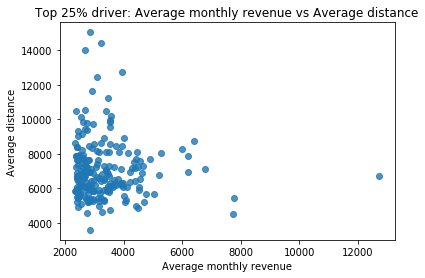

In [48]:
# Top 25% driver
# Plotting the average monthly revenue against the average distance 
fig1 = sns.regplot(x=top["average_monthly_revenue"], y=top["average_distance"], fit_reg=False) # fit_reg = True if we want a fitting line
plt.xlabel("Average monthly revenue")
plt.xlabel("Average monthly revenue")
plt.ylabel("Average distance")
plt.title("Top 25% driver: Average monthly revenue vs Average distance")
plt.show(fig1)

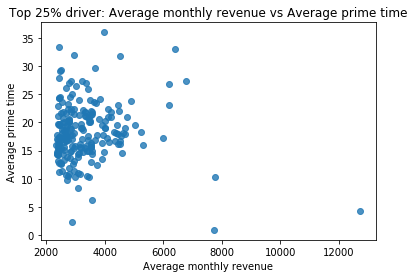

In [49]:
# Top 25% driver
# Plotting the average monthly revenue against the average prime time 
fig2 = sns.regplot(x=top["average_monthly_revenue"], y=top["average_prime_time"], fit_reg=False) # fit_reg = True if we want a fitting line
plt.xlabel("Average monthly revenue")
plt.ylabel("Average prime time")
plt.title("Top 25% driver: Average monthly revenue vs Average prime time")
plt.show(fig2)

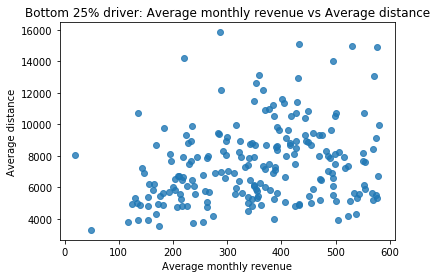

In [50]:
# Bottom 25% driver
# Plotting the average monthly revenue against the average distance 
fig3 = sns.regplot(x=bottom["average_monthly_revenue"], y=bottom["average_distance"], fit_reg=False) # fit_reg = True if we want a fitting line
plt.xlabel("Average monthly revenue")
plt.xlabel("Average monthly revenue")
plt.ylabel("Average distance")
plt.title("Bottom 25% driver: Average monthly revenue vs Average distance")
plt.show(fig3)

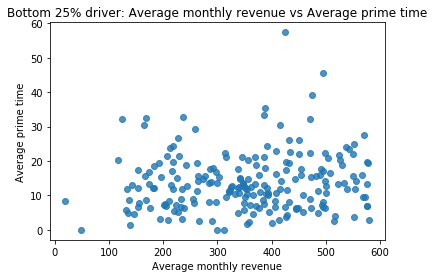

In [51]:
# Bottom 25% driver
# Plotting the average monthly revenue against the average distance 
fig4 = sns.regplot(x=bottom["average_monthly_revenue"], y=bottom["average_prime_time"], fit_reg=False) # fit_reg = True if we want a fitting line
plt.xlabel("Average monthly revenue")
plt.xlabel("Average monthly revenue")
plt.ylabel("Average prime time")
plt.title("Bottom 25% driver: Average monthly revenue vs Average prime time")
plt.show(fig4)

In [53]:
# Hypothesis test on the average distance of the top and bottom 25% driver 
Q1_ave_dist = top["average_distance"].mean()
Q2_ave_dist = bottom["average_distance"].mean()
mean_diff_dist = Q1_ave_dist - Q2_ave_dist

sd_Q1_dist = np.std(top["average_distance"])
sd_Q2_dist = np.std(bottom["average_distance"]) 
se_general = (sd_Q1_dist*2/210 + sd_Q2_dist**2/210)**(0.5)
alpha = 0.05
t = (mean_diff_dist - 0)/se_general
print('SD (Q1 prime):',round(sd_Q1_dist,2))
print('SD (Q2 prime):',round(sd_Q2_dist,2))
print('SE:   ',round(se_general,2))
print('Q1_ave_prime - Q2_ave_prime', mean_diff_dist)
print('Df:', 209 , 'degrees of freedom')
print('t-score:', t)
print('p-value(one-sided)', 0.007353)
#The P-Value: https://www.socscistatistics.com/pvalues/tdistribution.aspx

SD (Q1 prime): 1736.59
SD (Q2 prime): 2470.99
SE:    170.56
Q1_ave_prime - Q2_ave_prime -419.7825413475557
Df: 209 degrees of freedom
t-score: -2.461163010122696
p-value(one-sided) 0.007353


In [54]:
# Hypothesis test on the prime time of the top and bottom 25% driver 

Q1_ave_prime = top["average_prime_time"].mean()
Q2_ave_prime = bottom["average_prime_time"].mean()
mean_diff_prime = Q1_ave_prime - Q2_ave_prime

sd_Q1_prime = np.std(top["average_prime_time"])
sd_Q2_prime = np.std(bottom["average_prime_time"]) 
se_general = (sd_Q1_prime*2/210 + sd_Q2_prime**2/210)**(0.5)
alpha = 0.05
t = (mean_diff_prime - 0)/se_general
print('SD (Q1 prime):',round(sd_Q1_prime,2))
print('SD (Q2 prime):',round(sd_Q2_prime,2))
print('SE:   ',round(se_general,2))
print('Q1_ave_prime - Q2_ave_prime', mean_diff_prime)
print('Df:', 209 , 'degrees of freedom')
print('t-score:', t)
print('p-value(one-sided)', 0.00001)
#The P-Value: https://www.socscistatistics.com/pvalues/tdistribution.aspx

SD (Q1 prime): 5.22
SD (Q2 prime): 8.38
SE:    0.62
Q1_ave_prime - Q2_ave_prime 4.605892686316942
Df: 209 degrees of freedom
t-score: 7.432470043741781
p-value(one-sided) 1e-05


In [55]:
top["PTV_driver"] = top["average_monthly_revenue"]*12 # Projected lifetime 
bottom["PTV_driver"] = bottom["average_monthly_revenue"]*12 # Projected lifetime 

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
top.head()

,driver_id,driver_onboard_date,revenue,short_ride,long_ride,first_ride,last_ride,lifetime,set_up_time,average_monthly_revenue,average_distance,average_prime_time,PTV_driver
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,5463.35,84,124,2016-04-29 07:55:52,2016-06-24 13:07:43,56 days,0 days,2926.79,8329.717333,12.533333,35121.48
5,0213f8b59219e32142711992ca4ec01f,2016-04-07,2983.58,53,59,2016-04-07 19:03:56,2016-05-07 22:10:21,30 days,0 days,2983.58,6499.650000,10.312500,35802.96
8,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06,5266.91,74,109,2016-05-06 16:45:36,2016-06-26 17:09:29,51 days,0 days,3098.18,8133.942149,10.950413,37178.16
13,039da9c077e17af98ca8530e4d7975f1,2016-05-04,5020.40,111,72,2016-05-04 20:11:47,2016-06-26 01:37:08,53 days,0 days,2841.74,5369.154040,22.348485,34100.88
18,04d686ef2fba281e395992a28f14fdd3,2016-05-14,4645.21,86,88,2016-05-14 08:06:19,2016-06-24 12:39:08,41 days,0 days,3398.93,8128.455975,15.015723,40787.16


In [58]:
bottom.head()

,driver_id,driver_onboard_date,revenue,short_ride,long_ride,first_ride,last_ride,lifetime,set_up_time,average_monthly_revenue,average_distance,average_prime_time,PTV_driver
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,332.42,10,2,2016-03-29 22:33:44,2016-06-22 13:20:22,85 days,0 days,117.32,3791.322581,20.161290,1407.84
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,494.27,11,7,2016-04-05 10:56:24,2016-06-12 20:23:36,68 days,0 days,218.06,7930.970588,19.852941,2616.72
6,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07,707.27,8,5,2016-05-07 15:32:53,2016-06-25 20:13:18,49 days,0 days,433.02,4861.698113,22.641509,5196.24
10,02e440f6c209206375833cef02e0cbae,2016-03-31,798.39,9,18,2016-03-31 11:35:01,2016-05-18 08:26:29,48 days,0 days,498.99,8133.482143,14.285714,5987.88
12,039c5afbca8e03e4c18d9c8ea94140ac,2016-04-12,478.42,14,7,2016-04-12 21:21:11,2016-06-12 21:48:09,61 days,0 days,235.29,6461.894737,11.842105,2823.48
